In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
import seaborn as sns
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-86cff3bce7ac>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [72]:
color_dict=sns.color_palette("coolwarm", 3)

In [67]:
color_dict[0]

(0.5543118699137254, 0.6900970112156862, 0.9955155482352941)

In [54]:
color_dict

[(0.5543118699137254, 0.6900970112156862, 0.9955155482352941),
 (0.8674276350862745, 0.864376599772549, 0.8626024620196079),
 (0.9566532109764706, 0.598033822717647, 0.4773022923529412)]

In [2]:
path_data = '/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/evaluation_metrics/US'

### S=0.95

In [33]:
df = pd.read_csv(os.path.join(path_data, 'threshold_95', 'plot_data_95.csv'))
df.head()

,index,iter,precision_top20,precision_top_T,expansion_rate
0,is_hired_1mo,0,0.9,0.545455,0.00141
1,is_hired_1mo,1,1.0,0.730000,0.00452
2,is_hired_1mo,2,1.0,1.000000,0.01630
3,is_hired_1mo,3,1.0,0.822222,0.00655
4,is_hired_1mo,4,1.0,0.983333,0.02230


In [34]:
df['expansion_rate'] = 1 - df['expansion_rate'] 

In [35]:
df.head()

,index,iter,precision_top20,precision_top_T,expansion_rate
0,is_hired_1mo,0,0.9,0.545455,0.99859
1,is_hired_1mo,1,1.0,0.730000,0.99548
2,is_hired_1mo,2,1.0,1.000000,0.98370
3,is_hired_1mo,3,1.0,0.822222,0.99345
4,is_hired_1mo,4,1.0,0.983333,0.97770


In [38]:
df['avg'] = df[['precision_top_T', 'expansion_rate']].mean(axis=1)

In [3]:
labels=['is_hired_1mo', 'is_unemployed', 'job_offer', 'job_search', 'lost_job_1mo']

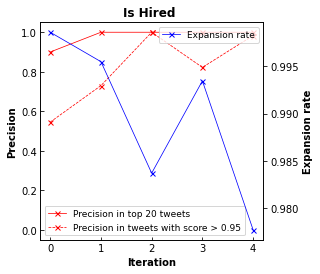

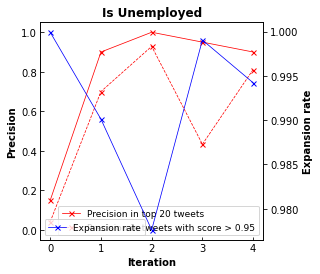

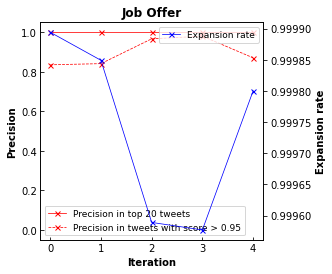

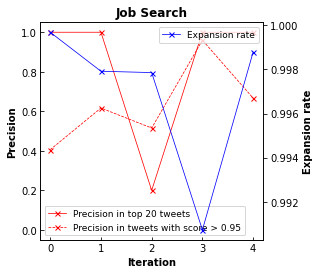

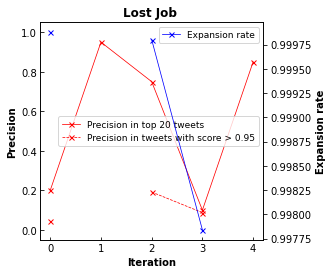

In [37]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    ax2 = ax.twinx()
    df_label = df.loc[df['index'] == label].reset_index(drop=True)
    # plot precision_top20
    df_label.plot(
    y='precision_top20',
    x='iter',
    ax=ax,
    linewidth=.75,
    color='r',
    style='-',
    marker='x',
    markersize=5,
    label=f'Precision in top 20 tweets')
    # plot precision top T
    df_label.plot(
    y='precision_top_T',
    x='iter',
    ax=ax,
    linewidth=.75,
    color='r',
    style='--',
    marker='x',
    markersize=5,
    label=f'Precision in tweets with score > 0.95')
    # plot expansion rate
    df_label.plot(
    y='expansion_rate',
    x='iter',
    ax=ax2,
    linewidth=.75,
    color='b',
    style='-',
    marker='x',
    markersize=5,
    label=f'Expansion rate')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Precision',fontweight='bold')
    ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data,'plots', f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

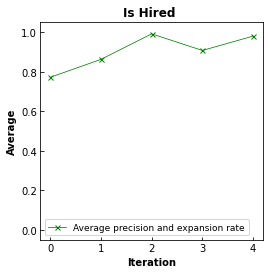

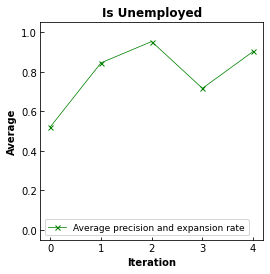

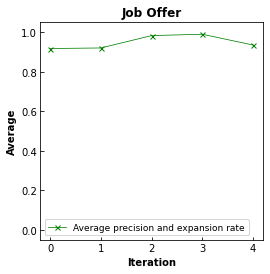

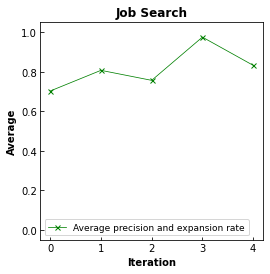

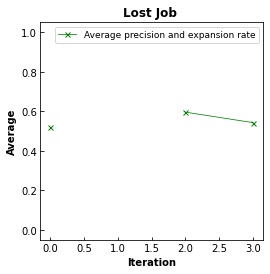

In [41]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    df_label = df.loc[df['index'] == label].reset_index(drop=True)
    # plot precision_top20
    df_label.plot(
    y='avg',
    x='iter',
    ax=ax,
    linewidth=.75,
    color='g',
    style='-',
    marker='x',
    markersize=5,
    label=f'Average precision and expansion rate')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Average',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
    ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data,'plots', f'{label}_avg.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

## Top 1K

In [69]:
df = pd.read_csv(os.path.join(path_data, 'top_1000', 'plot_data_1K.csv'))
df.head()

,index,iter,precision_top20,precision_top_T,expansion_rate
0,is_hired_1mo,0,0.9,0.9,0.145
1,is_hired_1mo,1,1.0,1.0,0.104
2,is_hired_1mo,2,1.0,1.0,0.029
3,is_hired_1mo,3,1.0,1.0,0.023
4,is_hired_1mo,4,1.0,1.0,0.022


### precision

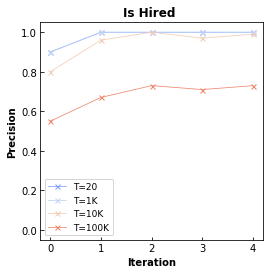

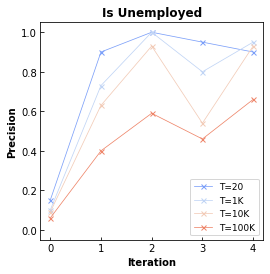

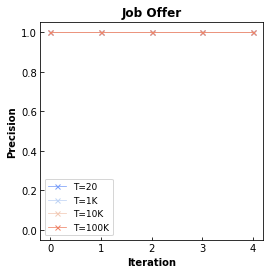

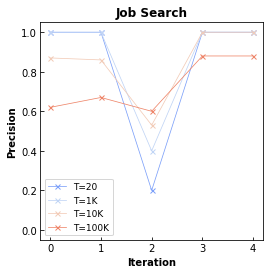

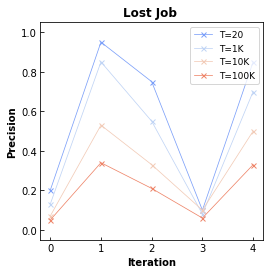

In [76]:
color_dict=sns.color_palette("coolwarm", 4)
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
#     ax2 = ax.twinx()
    df_label = df.loc[df['index'] == label].reset_index(drop=True)
    # plot precision_top20
    df_label.plot(
    y='precision_top20',
    x='iter',
    ax=ax,
    linewidth=.75,
    color=color_dict[0],
    style='-',
    marker='x',
    markersize=5,
    label=f'T=20')
    for count, topk in enumerate([1000, 10000, 100000]):
        df = pd.read_csv(os.path.join(path_data, f'top_{topk}', f'plot_data_{int(topk/1000)}K.csv'))
        df_label = df.loc[df['index'] == label].reset_index(drop=True)
        # plot precision top T
        df_label.plot(
        y='precision_top_T',
        x='iter',
        ax=ax,
        linewidth=.75,
        color=color_dict[count+1],
        style='-',
        marker='x',
        markersize=5,
        label=f'T={int(topk/1000)}K')
    # plot expansion rate
#     df_label.plot(
#     y='expansion_rate',
#     x='iter',
#     ax=ax2,
#     linewidth=.75,
#     color='b',
#     style='-',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Precision',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
#     ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data, 'top_1000', 'plots', f'precision_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

### expansion positives

In [21]:
df = pd.read_csv(os.path.join(path_data, 'top_1000', 'expansion_positives_seedlist_all.csv'))
df1 = pd.read_csv(os.path.join(path_data, 'top_1000', 'expansion_positives_seedlist_class_specific.csv'))
df.columns = ['index', 'expansion_rate_all', 'iter']
df['expansion_rate_class'] = df1['expansion_rate']
df.head()

,index,expansion_rate_all,iter,expansion_rate_class
0,is_hired_1mo,0.166667,0,0.388889
1,is_hired_1mo,0.175000,1,0.175000
2,is_hired_1mo,0.025000,2,0.275000
3,is_hired_1mo,0.050000,3,0.250000
4,is_hired_1mo,0.000000,4,0.525000


In [82]:
color_dict[0]

(0.5543118699137254, 0.6900970112156862, 0.9955155482352941)

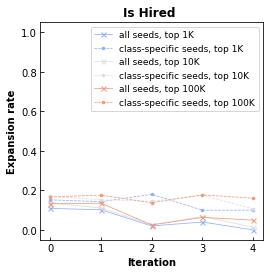

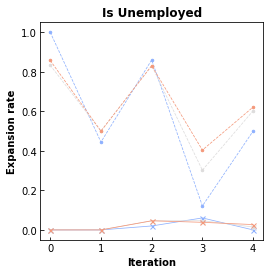

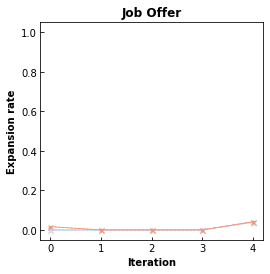

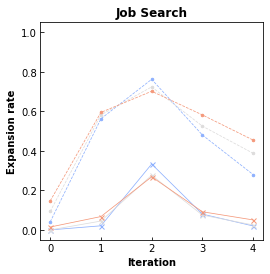

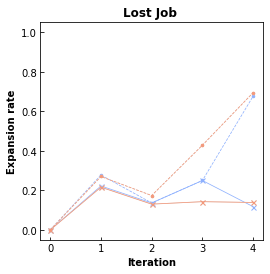

In [11]:
color_dict=sns.color_palette("coolwarm", 3)
for count_label, label in enumerate(labels):
    fig,ax = plt.subplots(figsize=(4,4))
#     ax2 = ax.twinx()
    for count, topk in enumerate([1000, 10000, 100000]):
        df = pd.read_csv(os.path.join(path_data, f'top_{topk}', 'expansion_positives_seedlist_all.csv'))
        df1 = pd.read_csv(os.path.join(path_data, f'top_{topk}', 'expansion_positives_seedlist_class_specific.csv'))
        df.columns = ['index', 'expansion_rate_all', 'iter']
        df['expansion_rate_class'] = df1['expansion_rate']
        df_label = df.loc[df['index'] == label].reset_index(drop=True)
        # plot precision_top20
        df_label.plot(
        y='expansion_rate_all',
        x='iter',
        ax=ax,
        linewidth=.75,
        color=color_dict[count],
        style='-',
        marker='x',
        markersize=5,
        label=f'all seeds, top {int(topk/1000)}K')
        # plot precision top T
        df_label.plot(
        y='expansion_rate_class',
        x='iter',
        ax=ax,
        linewidth=.75,
        color=color_dict[count],
        style='--',
        marker='.',
        markersize=5,
        label=f'class-specific seeds, top {int(topk/1000)}K')
    # plot expansion rate
#     df_label.plot(
#     y='expansion_rate',
#     x='iter',
#     ax=ax2,
#     linewidth=.75,
#     color='b',
#     style='-',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Expansion rate',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    if count_label == 0:
        ax.legend(loc='best',fontsize=9)
    else:
        ax.get_legend().remove()
    ax.set_ylim([-0.05,1.05])
#     ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data, 'top_1000', 'plots', f'expansion_positive_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

### expansion positives (new)

In [20]:
path_data = '/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/evaluation_metrics/US'

In [26]:
df = pd.read_csv(os.path.join(path_data, f'top_1000', 'expansion_positives_new.csv'))
df_label = df.loc[df['index'] == 'job_search'].reset_index(drop=True)
df_label.head(n=20)

,index,expansion_rate,iter
0,job_search,-0.468018,0
1,job_search,-0.456190,1
2,job_search,-0.361721,2
3,job_search,-0.442527,3
4,job_search,-0.463342,4


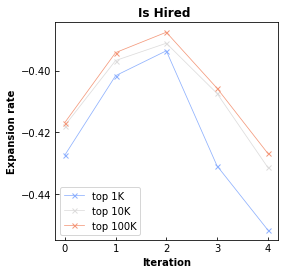

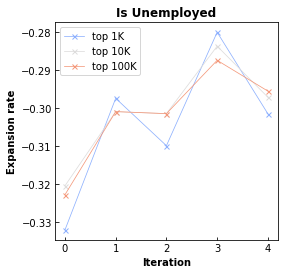

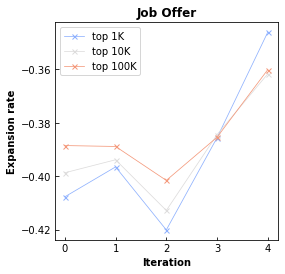

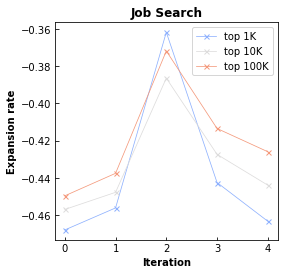

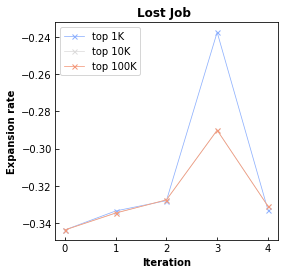

In [30]:
color_dict=sns.color_palette("coolwarm", 3)
for count_label, label in enumerate(labels):
    fig,ax = plt.subplots(figsize=(4,4))
    for count, topk in enumerate([1000, 10000, 100000]):
        df = pd.read_csv(os.path.join(path_data, f'top_{topk}', 'expansion_positives_new.csv'))
        df_label = df.loc[df['index'] == label].reset_index(drop=True)
        # plot expansion rate
        df_label.plot(
        y='expansion_rate',
        x='iter',
        ax=ax,
        linewidth=.75,
        color=color_dict[count],
        style='-',
        marker='x',
        markersize=5,
        label=f'top {int(topk/1000)}K')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Expansion rate',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
#     if count_label == 0:
#         ax.legend(loc='best',fontsize=9)
#     else:
#         ax.get_legend().remove()
#     ax.set_ylim([-0.05,1.05])
#     ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data, f'expansion_positive_new_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

### diversity positives

In [23]:
df = pd.read_csv(os.path.join(path_data, 'top_1000', 'expansion_diversity_positives.csv'))
df.head()

,index,expansion_rate,diversity_score,iter
0,is_hired_1mo,0.166667,-0.651343,0
1,is_hired_1mo,0.175000,-0.667998,1
2,is_hired_1mo,0.025000,-0.557142,2
3,is_hired_1mo,0.050000,-0.591721,3
4,is_hired_1mo,0.000000,-0.717739,4


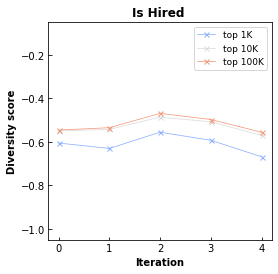

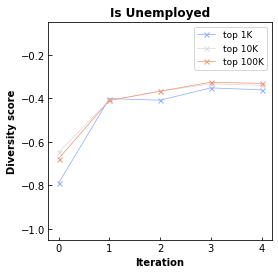

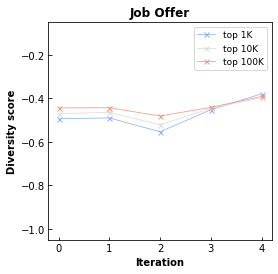

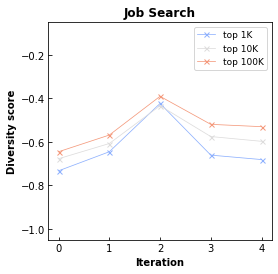

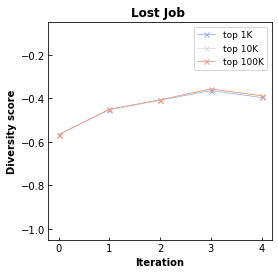

In [12]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
#     ax2 = ax.twinx()
    for count, topk in enumerate([1000, 10000, 100000]):
        df = pd.read_csv(os.path.join(path_data, f'top_{topk}', 'diversity_positives.csv'))
        df_label = df.loc[df['index'] == label].reset_index(drop=True)
        # plot precision_top20
        df_label.plot(
        y='diversity_score',
        x='iter',
        ax=ax,
        linewidth=.75,
        color=color_dict[count],
        style='-',
        marker='x',
        markersize=5,
        label=f'top {int(topk/1000)}K')
    # plot precision top T
#     df_label.plot(
#     y='expansion_rate_class',
#     x='iter',
#     ax=ax,
#     linewidth=.75,
#     color='b',
#     style='--',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate with class-specific seeds')
    # plot expansion rate
#     df_label.plot(
#     y='expansion_rate',
#     x='iter',
#     ax=ax2,
#     linewidth=.75,
#     color='b',
#     style='-',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Diversity score',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-1.05,-0.05])
#     ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data, 'top_1000', 'plots', f'diversity_positive_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

### diversity random set

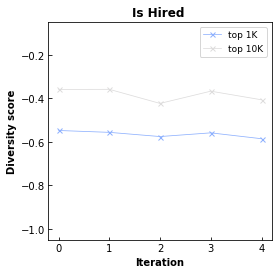

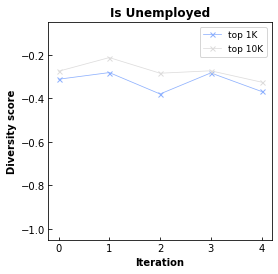

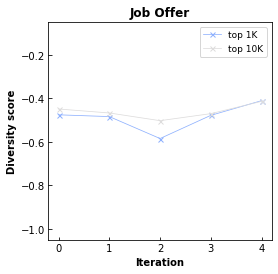

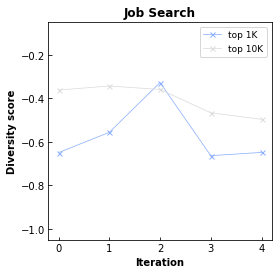

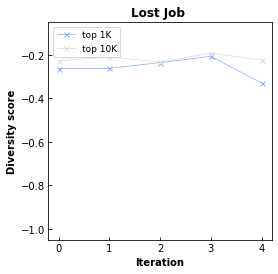

In [8]:
color_dict=sns.color_palette("coolwarm", 3)
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
#     ax2 = ax.twinx()
    for count, topk in enumerate([1000, 10000]):#, 100000]):
        df = pd.read_csv(os.path.join(path_data, f'top_{topk}', 'diversity_random_set.csv'))
        df_label = df.loc[df['index'] == label].reset_index(drop=True)
        # plot precision_top20
        df_label.plot(
        y='diversity_score',
        x='iter',
        ax=ax,
        linewidth=.75,
        color=color_dict[count],
        style='-',
        marker='x',
        markersize=5,
        label=f'top {int(topk/1000)}K')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Diversity score',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-1.05,-0.05])
#     ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data, 'top_1000', 'plots', f'diversity_random_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

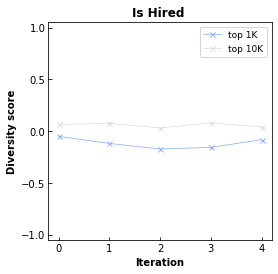

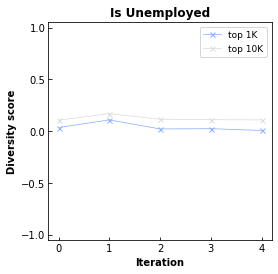

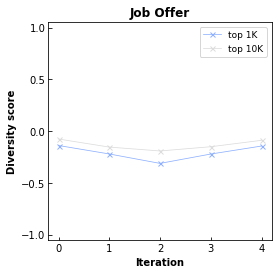

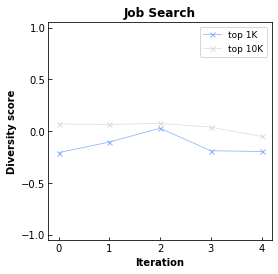

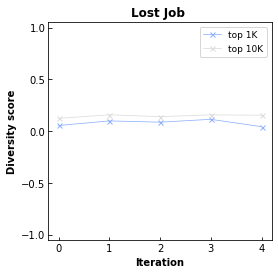

In [7]:
color_dict=sns.color_palette("coolwarm", 3)
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
#     ax2 = ax.twinx()
    for count, topk in enumerate([1000, 10000]):#, 100000]):
        df = pd.read_csv(os.path.join(path_data, f'top_{topk}', 'diversity_random_set.csv'))
        df_label = df.loc[df['index'] == label].reset_index(drop=True)
        # plot precision_top20
        df_label.plot(
        y='diversity_score',
        x='iter',
        ax=ax,
        linewidth=.75,
        color=color_dict[count],
        style='-',
        marker='x',
        markersize=5,
        label=f'top {int(topk/1000)}K')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Diversity score',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-1.05,1.05])
#     ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data, 'top_1000', 'plots', f'diversity_random_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

## Top 10K

In [16]:
df = pd.read_csv(os.path.join(path_data, 'top_10000', 'plot_data_10K.csv'))
df.head()

,index,iter,precision_top20,precision_top_T,expansion_rate
0,is_hired_1mo,0,0.9,0.80,0.4774
1,is_hired_1mo,1,1.0,0.96,0.3308
2,is_hired_1mo,2,1.0,1.00,0.0336
3,is_hired_1mo,3,1.0,0.97,0.2433
4,is_hired_1mo,4,1.0,0.99,0.0861


### precision

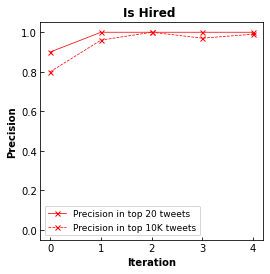

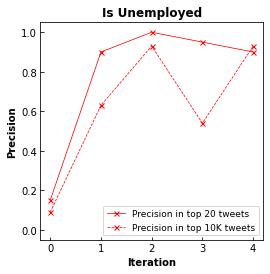

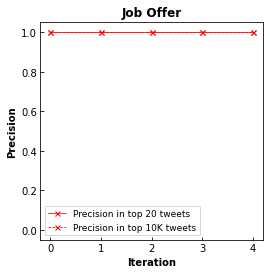

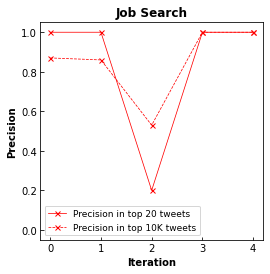

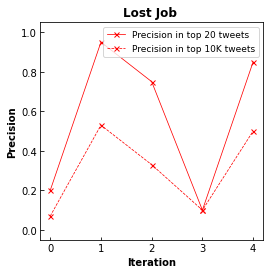

In [17]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
#     ax2 = ax.twinx()
    df_label = df.loc[df['index'] == label].reset_index(drop=True)
    # plot precision_top20
    df_label.plot(
    y='precision_top20',
    x='iter',
    ax=ax,
    linewidth=.75,
    color='r',
    style='-',
    marker='x',
    markersize=5,
    label=f'Precision in top 20 tweets')
    # plot precision top T
    df_label.plot(
    y='precision_top_T',
    x='iter',
    ax=ax,
    linewidth=.75,
    color='r',
    style='--',
    marker='x',
    markersize=5,
    label=f'Precision in top 10K tweets')
    # plot expansion rate
#     df_label.plot(
#     y='expansion_rate',
#     x='iter',
#     ax=ax2,
#     linewidth=.75,
#     color='b',
#     style='-',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Precision',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
#     ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data, 'top_10000', 'plots', f'precision_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

### expansion positives

In [27]:
df = pd.read_csv(os.path.join(path_data, 'top_10000', 'expansion_positives_seedlist_all.csv'))
df1 = pd.read_csv(os.path.join(path_data, 'top_10000', 'expansion_positives_seedlist_class_specific.csv'))
df.columns = ['index', 'expansion_rate_all', 'iter']
df['expansion_rate_class'] = df1['expansion_rate']
df.head()

,index,expansion_rate_all,iter,expansion_rate_class
0,is_hired_1mo,0.178571,0,0.375000
1,is_hired_1mo,0.119403,1,0.328358
2,is_hired_1mo,0.014286,2,0.357143
3,is_hired_1mo,0.029412,3,0.323529
4,is_hired_1mo,0.000000,4,0.521739


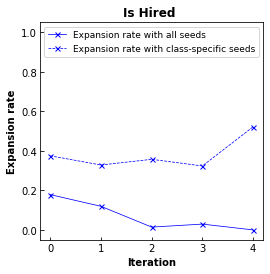

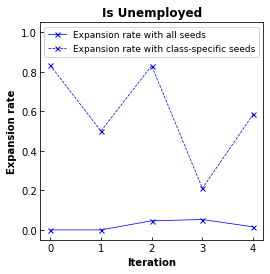

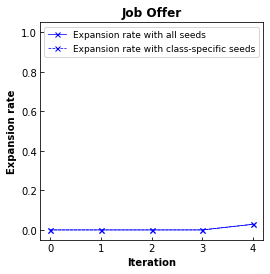

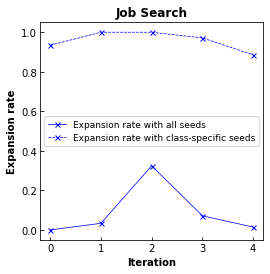

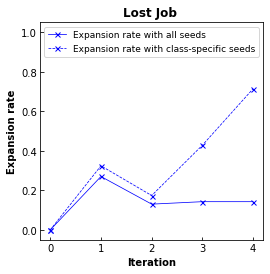

In [28]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
#     ax2 = ax.twinx()
    df_label = df.loc[df['index'] == label].reset_index(drop=True)
    # plot precision_top20
    df_label.plot(
    y='expansion_rate_all',
    x='iter',
    ax=ax,
    linewidth=.75,
    color='b',
    style='-',
    marker='x',
    markersize=5,
    label=f'Expansion rate with all seeds')
    # plot precision top T
    df_label.plot(
    y='expansion_rate_class',
    x='iter',
    ax=ax,
    linewidth=.75,
    color='b',
    style='--',
    marker='x',
    markersize=5,
    label=f'Expansion rate with class-specific seeds')
    # plot expansion rate
#     df_label.plot(
#     y='expansion_rate',
#     x='iter',
#     ax=ax2,
#     linewidth=.75,
#     color='b',
#     style='-',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Expansion rate',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
#     ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data, 'top_10000', 'plots', f'expansion_positive_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

### diversity positives

In [31]:
df = pd.read_csv(os.path.join(path_data, 'top_10000', 'expansion_diversity_positives.csv'))
df.head()

,index,expansion_rate,diversity_score,iter
0,is_hired_1mo,0.178571,-0.560331,0
1,is_hired_1mo,0.119403,-0.566994,1
2,is_hired_1mo,0.014286,-0.514641,2
3,is_hired_1mo,0.029412,-0.543583,3
4,is_hired_1mo,0.000000,-0.599199,4


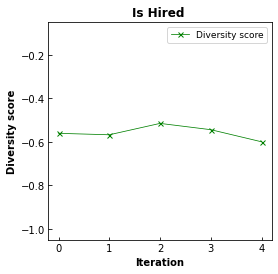

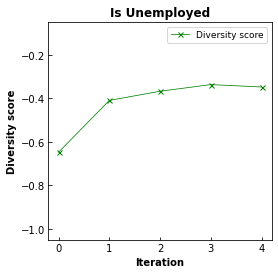

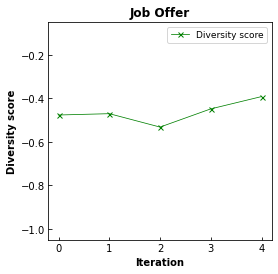

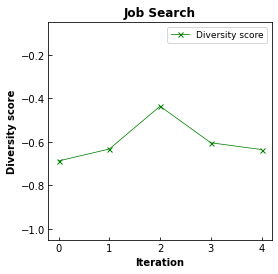

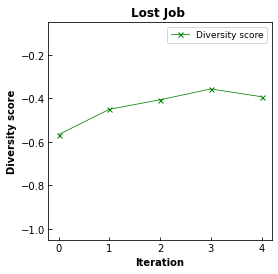

In [32]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
#     ax2 = ax.twinx()
    df_label = df.loc[df['index'] == label].reset_index(drop=True)
    # plot precision_top20
    df_label.plot(
    y='diversity_score',
    x='iter',
    ax=ax,
    linewidth=.75,
    color='g',
    style='-',
    marker='x',
    markersize=5,
    label=f'Diversity score')
    # plot precision top T
#     df_label.plot(
#     y='expansion_rate_class',
#     x='iter',
#     ax=ax,
#     linewidth=.75,
#     color='b',
#     style='--',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate with class-specific seeds')
    # plot expansion rate
#     df_label.plot(
#     y='expansion_rate',
#     x='iter',
#     ax=ax2,
#     linewidth=.75,
#     color='b',
#     style='-',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Diversity score',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-1.05,-0.05])
#     ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data, 'top_10000', 'plots', f'diversity_positive_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

## top 100K

In [18]:
df = pd.read_csv(os.path.join(path_data, 'top_100000', 'plot_data_100K.csv'))
df.head()

,index,iter,precision_top20,precision_top_T,expansion_rate
0,is_hired_1mo,0,0.9,0.55,0.88802
1,is_hired_1mo,1,1.0,0.67,0.84476
2,is_hired_1mo,2,1.0,0.73,0.64734
3,is_hired_1mo,3,1.0,0.71,0.82388
4,is_hired_1mo,4,1.0,0.73,0.76013


### precision

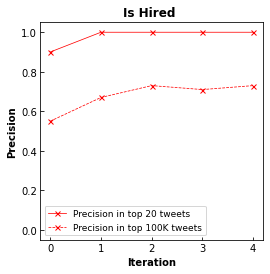

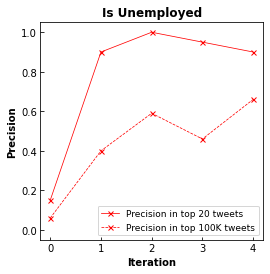

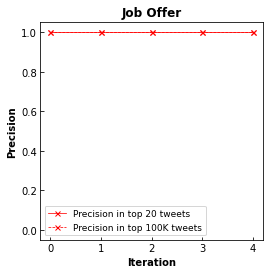

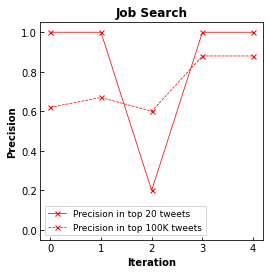

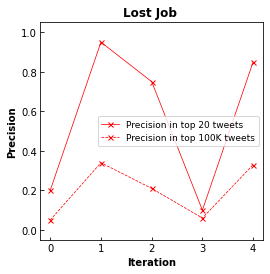

In [19]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
#     ax2 = ax.twinx()
    df_label = df.loc[df['index'] == label].reset_index(drop=True)
    # plot precision_top20
    df_label.plot(
    y='precision_top20',
    x='iter',
    ax=ax,
    linewidth=.75,
    color='r',
    style='-',
    marker='x',
    markersize=5,
    label=f'Precision in top 20 tweets')
    # plot precision top T
    df_label.plot(
    y='precision_top_T',
    x='iter',
    ax=ax,
    linewidth=.75,
    color='r',
    style='--',
    marker='x',
    markersize=5,
    label=f'Precision in top 100K tweets')
    # plot expansion rate
#     df_label.plot(
#     y='expansion_rate',
#     x='iter',
#     ax=ax2,
#     linewidth=.75,
#     color='b',
#     style='-',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Precision',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
#     ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data, 'top_100000', 'plots', f'precision_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

### expansion positives

In [29]:
df = pd.read_csv(os.path.join(path_data, 'top_100000', 'expansion_positives_seedlist_all.csv'))
df1 = pd.read_csv(os.path.join(path_data, 'top_100000', 'expansion_positives_seedlist_class_specific.csv'))
df.columns = ['index', 'expansion_rate_all', 'iter']
df['expansion_rate_class'] = df1['expansion_rate']
df.head()

,index,expansion_rate_all,iter,expansion_rate_class
0,is_hired_1mo,0.200000,0,0.383333
1,is_hired_1mo,0.162162,1,0.378378
2,is_hired_1mo,0.025000,2,0.387500
3,is_hired_1mo,0.064103,3,0.384615
4,is_hired_1mo,0.037500,4,0.537500


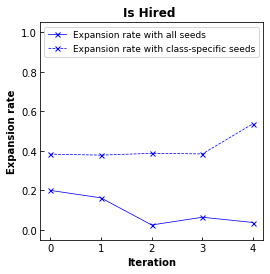

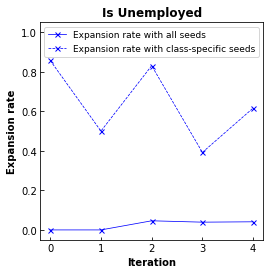

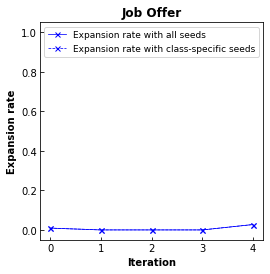

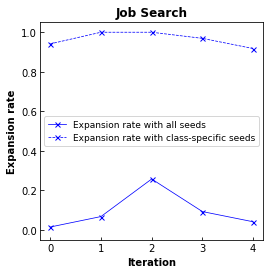

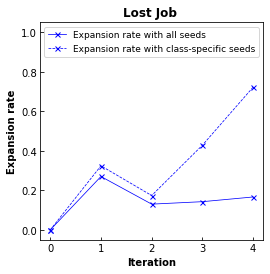

In [30]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
#     ax2 = ax.twinx()
    df_label = df.loc[df['index'] == label].reset_index(drop=True)
    # plot precision_top20
    df_label.plot(
    y='expansion_rate_all',
    x='iter',
    ax=ax,
    linewidth=.75,
    color='b',
    style='-',
    marker='x',
    markersize=5,
    label=f'Expansion rate with all seeds')
    # plot precision top T
    df_label.plot(
    y='expansion_rate_class',
    x='iter',
    ax=ax,
    linewidth=.75,
    color='b',
    style='--',
    marker='x',
    markersize=5,
    label=f'Expansion rate with class-specific seeds')
    # plot expansion rate
#     df_label.plot(
#     y='expansion_rate',
#     x='iter',
#     ax=ax2,
#     linewidth=.75,
#     color='b',
#     style='-',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Expansion rate',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,1.05])
#     ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data, 'top_100000', 'plots', f'expansion_positive_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

### diversity positives

In [33]:
df = pd.read_csv(os.path.join(path_data, 'top_100000', 'expansion_diversity_positives.csv'))
df.head()

,index,expansion_rate,diversity_score,iter
0,is_hired_1mo,0.200000,-0.545354,0
1,is_hired_1mo,0.162162,-0.534425,1
2,is_hired_1mo,0.025000,-0.468522,2
3,is_hired_1mo,0.064103,-0.497754,3
4,is_hired_1mo,0.037500,-0.558483,4


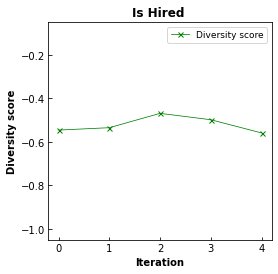

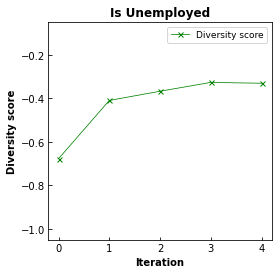

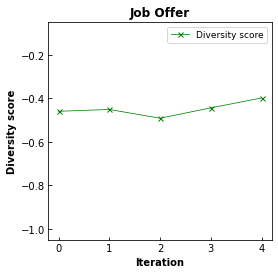

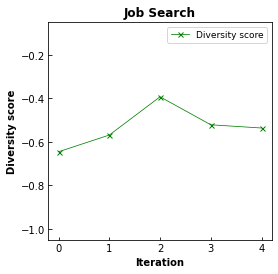

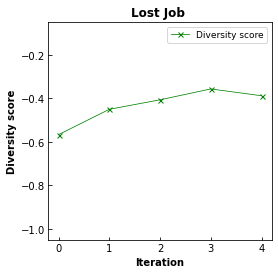

In [34]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
#     ax2 = ax.twinx()
    df_label = df.loc[df['index'] == label].reset_index(drop=True)
    # plot precision_top20
    df_label.plot(
    y='diversity_score',
    x='iter',
    ax=ax,
    linewidth=.75,
    color='g',
    style='-',
    marker='x',
    markersize=5,
    label=f'Diversity score')
    # plot precision top T
#     df_label.plot(
#     y='expansion_rate_class',
#     x='iter',
#     ax=ax,
#     linewidth=.75,
#     color='b',
#     style='--',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate with class-specific seeds')
    # plot expansion rate
#     df_label.plot(
#     y='expansion_rate',
#     x='iter',
#     ax=ax2,
#     linewidth=.75,
#     color='b',
#     style='-',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Diversity score',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-1.05,-0.05])
#     ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data, 'top_100000', 'plots', f'diversity_positive_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

### recall

In [14]:
color_dict=sns.color_palette("coolwarm", 5)
color_dict

[(0.4358148063058824, 0.5707073031529412, 0.951717381282353),
 (0.6672529243333334, 0.7791764569999999, 0.992959213),
 (0.8674276350862745, 0.864376599772549, 0.8626024620196079),
 (0.968203399, 0.7208441, 0.6122929913333334),
 (0.9057834780117647, 0.4551856921647059, 0.35533588384705883)]

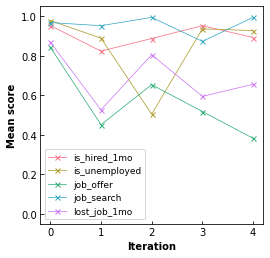

In [17]:
color_dict=sns.color_palette("husl", 5)
data_path = '/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/evaluation_metrics/US/recall/scored_sentences'
fig,ax = plt.subplots(figsize=(4,4))
for count, label in enumerate(labels):
    df = pd.read_csv(os.path.join(data_path, f'US-{label}.csv'))
    df = pd.DataFrame.from_dict(df.mean().to_dict(), orient='index', columns=['mean_score']).reset_index(drop=True).reset_index()
#     ax2 = ax.twinx()
    # plot precision_top20
    df.plot(
    y='mean_score',
    x='index',
    ax=ax,
    linewidth=.75,
    color=color_dict[count],
    style='-',
    marker='x',
    markersize=5,
    label=label)

    # plot expansion rate
#     df_label.plot(
#     y='expansion_rate',
#     x='iter',
#     ax=ax2,
#     linewidth=.75,
#     color='b',
#     style='-',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate')
ax.tick_params(which='both',direction='in',pad=3)
ax.locator_params(axis='y',nbins=6)
ax.set_ylabel('Mean score',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
ax.set_xlabel('Iteration',fontweight='bold')
#ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
ax.legend(loc='best',fontsize=9)
ax.set_ylim([-0.05,1.05])
#     ax2.legend(loc='best',fontsize=9)
plt.savefig(os.path.join(data_path, f'mean_score.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

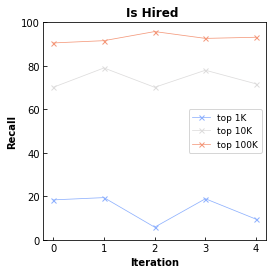

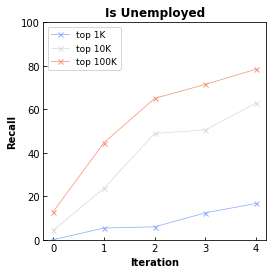

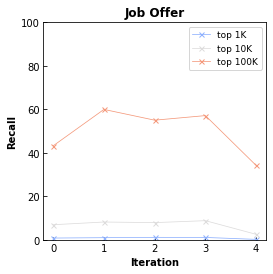

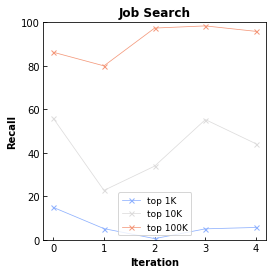

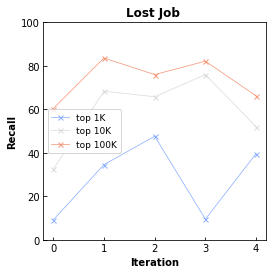

In [9]:
color_dict=sns.color_palette("coolwarm", 3)
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
#     ax2 = ax.twinx()
    for count, topk in enumerate([1000, 10000, 100000]):
        df = pd.read_csv(os.path.join(path_data, f'top_{topk}', 'recall.csv'))
        df_label = df.loc[df['index'] == label].reset_index(drop=True)
        # plot precision_top20
        df_label.plot(
        y='recall',
        x='iter',
        ax=ax,
        linewidth=.75,
        color=color_dict[count],
        style='-',
        marker='x',
        markersize=5,
        label=f'top {int(topk/1000)}K')
    # plot precision top T
#     df_label.plot(
#     y='expansion_rate_class',
#     x='iter',
#     ax=ax,
#     linewidth=.75,
#     color='b',
#     style='--',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate with class-specific seeds')
    # plot expansion rate
#     df_label.plot(
#     y='expansion_rate',
#     x='iter',
#     ax=ax2,
#     linewidth=.75,
#     color='b',
#     style='-',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Recall',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    ax.set_ylim([-0.05,100.05])
#     ax2.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(path_data, f'recall_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

In [12]:
path_data = '/home/manuto/Documents/world_bank/bert_twitter_labor/code/twitter/code/2-twitter_labor/7-misc/understanding_quantization'

In [8]:
df = pd.read_csv('/home/manuto/Documents/world_bank/bert_twitter_labor/code/twitter/code/2-twitter_labor/7-misc/understanding_quantization/kendall_tau_top10k.csv')
df.head()

,iter,index,Kendall Tau
0,0,is_hired_1mo,0.719788
1,1,is_hired_1mo,0.803532
2,2,is_hired_1mo,0.834064
3,3,is_hired_1mo,0.819873
4,4,is_hired_1mo,0.845133


<AxesSubplot:xlabel='iter'>

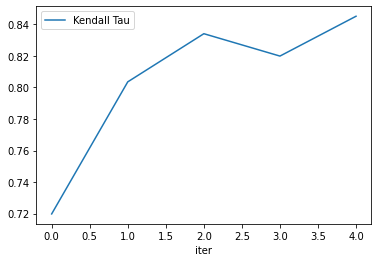

In [9]:
df1 = df.loc[df['index']=='is_hired_1mo']
df1.plot(x='iter', y='Kendall Tau')

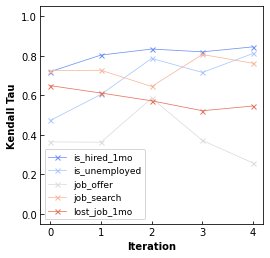

In [15]:
color_dict=sns.color_palette("coolwarm", 5)
fig,ax = plt.subplots(figsize=(4,4))
for count, label in enumerate(labels):
    df_label = df.loc[df['index'] == label].reset_index(drop=True)
    # plot precision_top20
    df_label.plot(
    y='Kendall Tau',
    x='iter',
    ax=ax,
    linewidth=.75,
    color=color_dict[count],
    style='-',
    marker='x',
    markersize=5,
    label=label)
    # plot precision top T
#     df_label.plot(
#     y='expansion_rate_class',
#     x='iter',
#     ax=ax,
#     linewidth=.75,
#     color='b',
#     style='--',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate with class-specific seeds')
    # plot expansion rate
#     df_label.plot(
#     y='expansion_rate',
#     x='iter',
#     ax=ax2,
#     linewidth=.75,
#     color='b',
#     style='-',
#     marker='x',
#     markersize=5,
#     label=f'Expansion rate')
ax.tick_params(which='both',direction='in',pad=3)
ax.locator_params(axis='y',nbins=6)
ax.set_ylabel('Kendall Tau',fontweight='bold')
#     ax2.set_ylabel('Expansion rate',fontweight='bold')
ax.set_xlabel('Iteration',fontweight='bold')
# ax.set_title('Rank correlation between PyTorch and quantized',fontweight='bold')
ax.legend(loc='best',fontsize=9)
ax.set_ylim([-0.05,1.05])
#     ax2.legend(loc='best',fontsize=9)
plt.savefig(os.path.join(path_data, f'correlation.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)